In [1]:
import torch

def euclidean(x:torch.tensor, y:torch.tensor)->torch.tensor:
    return torch.sqrt(torch.pow(x-y,2)).sum()

def cos_sim(x:torch.tensor, y:torch.tensor)->torch.tensor:
    return x.view(-1).dot(y.view(-1)) / (torch.norm(x)*torch.norm(y))

params: 25,557,032
--------------------------------------------------
(363, 338, 3)


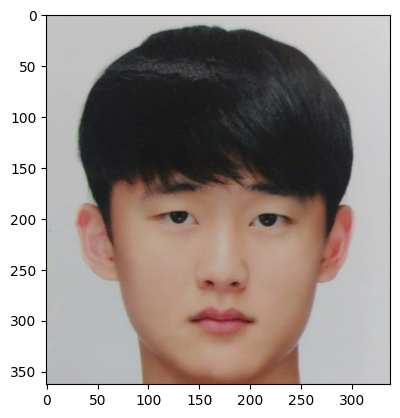

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


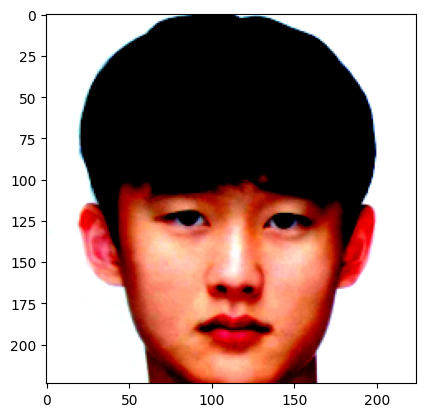

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


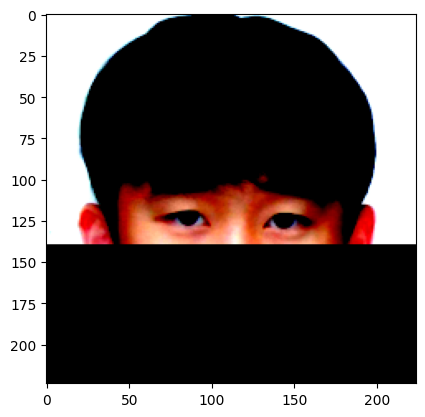

normal image shape: torch.Size([1, 3, 224, 224])
mask image shape: torch.Size([1, 3, 224, 224])
normal image output shape: torch.Size([1, 1000])
mask image output shape: torch.Size([1, 1000])
--------------------------------------------------
(3088, 2316, 3)


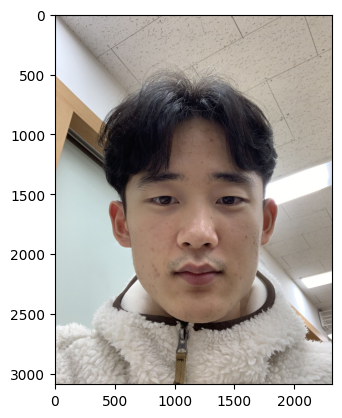

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


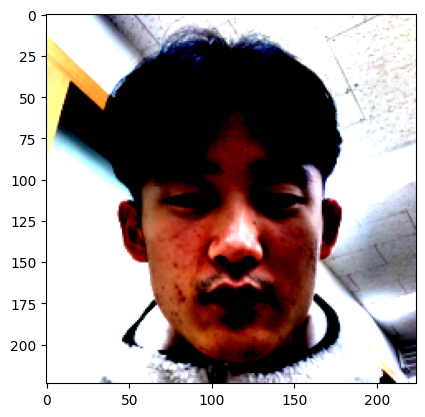

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


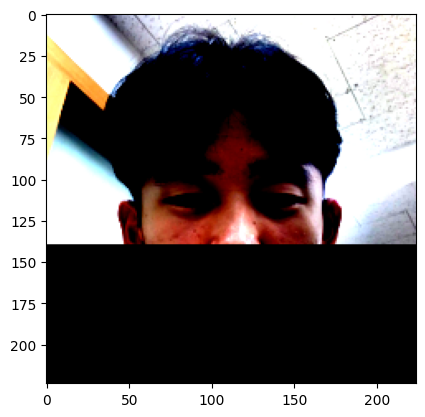

normal image shape: torch.Size([1, 3, 224, 224])
mask image shape: torch.Size([1, 3, 224, 224])
normal image output shape: torch.Size([1, 1000])
mask image output shape: torch.Size([1, 1000])
--------------------------------------------------
(273, 280, 3)


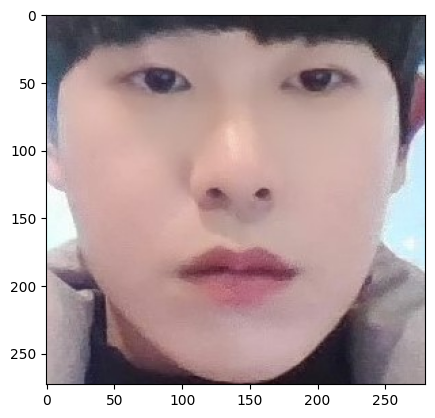

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


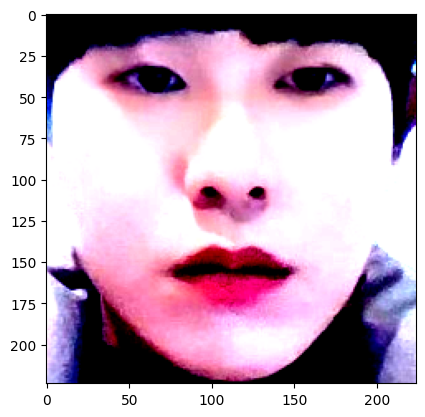

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


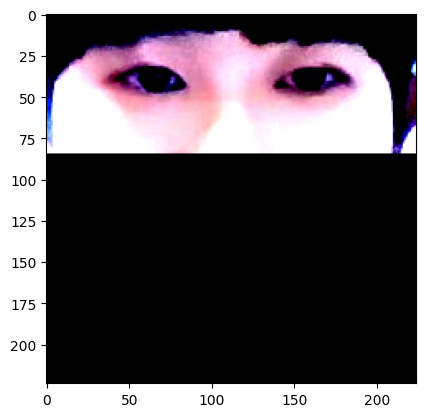

normal image shape: torch.Size([1, 3, 224, 224])
mask image shape: torch.Size([1, 3, 224, 224])
normal image output shape: torch.Size([1, 1000])
mask image output shape: torch.Size([1, 1000])
--------------------------------------------------
(616, 624, 3)


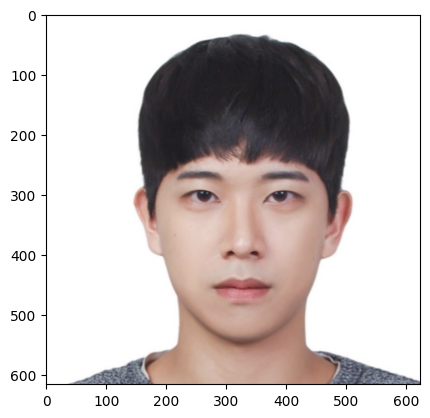

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


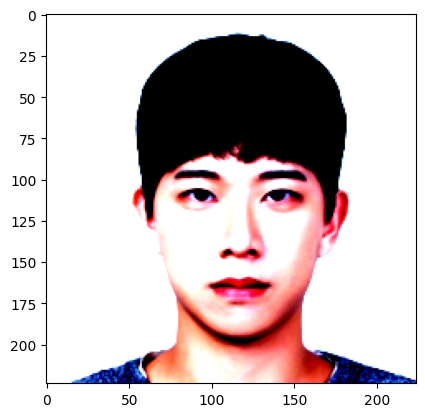

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


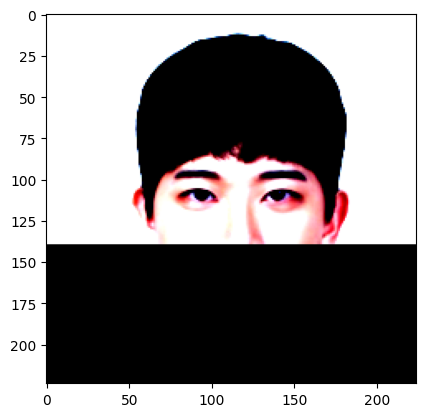

normal image shape: torch.Size([1, 3, 224, 224])
mask image shape: torch.Size([1, 3, 224, 224])
normal image output shape: torch.Size([1, 1000])
mask image output shape: torch.Size([1, 1000])


In [2]:
# Trained model with margin loss(ArcFace, CosFace, SphereFace)
import os
import torch
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from torch import nn
from torchvision import transforms
from torchvision import models


base_dir = "/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/"

model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
model.eval()
print("params: {:,}".format(sum([p.data.nelement() for p in model.parameters()])))

normal_vector_list = []
mask_vector_list = []
for i in range(4):
    print("-"*50)
    np_img = cv2.imread(os.path.join(base_dir,f"images/{i}.jpg"))
    np_img = cv2.cvtColor(np_img, cv2.COLOR_RGB2BGR)
    # np_img = np.array(img)
    if np_img.shape[-1] > 3:
        print("alpha channel remove")
        np_img = np_img[:,:,0:3]

    print(np_img.shape)
    plt.imshow(np_img)
    plt.show()

    min_size = min(np_img.shape[0:-1])
    image_transforms = transforms.Compose([
            transforms.ToPILImage(),
            transforms.CenterCrop((min_size,min_size)),
            transforms.Resize(size=(224,224)),
            transforms.ToTensor(),
            transforms.Normalize(
                [0.485, 0.456, 0.406], 
                [0.229, 0.224, 0.225]
            )
        ])

    torch_img = image_transforms(np_img)
    C, H, W = torch_img.size()
    torch_img = torch_img.view(1,C,H,W)
    mask_img = torch_img.clone()
    if i==0 or i==1 or i==3:
        mask_img.view(C,H,W).permute(1,2,0)[140:225,:,:] = 0.0
    if i==2:
        mask_img.view(C,H,W).permute(1,2,0)[85:225,:,:] = 0.0
    plt.imshow(torch_img.view(C,H,W).permute(1,2,0))
    plt.show()
    plt.imshow(mask_img.view(C,H,W).permute(1,2,0))
    plt.show()
    print("normal image shape:", torch_img.shape)
    print("mask image shape:", mask_img.shape)
    
    with torch.no_grad():
        model.eval()
        output1 = model(torch_img)
        output2 = model(mask_img)
    print("normal image output shape:", output1.shape)
    print("mask image output shape:", output2.shape)
    normal_vector_list.append(output1)
    mask_vector_list.append(output2)

In [3]:
print(euclidean(normal_vector_list[0],normal_vector_list[1])) # same
print(euclidean(normal_vector_list[0],normal_vector_list[2]))
print(euclidean(normal_vector_list[0],normal_vector_list[3]))
# print(euclidean(normal_vector_list[0],normal_vector_list[4]))
print()
print(euclidean(normal_vector_list[2],normal_vector_list[3])) # same
# print(euclidean(normal_vector_list[2],normal_vector_list[4])) # same
print(euclidean(normal_vector_list[2],normal_vector_list[0]))
print(euclidean(normal_vector_list[2],normal_vector_list[1]))

tensor(450.1344)
tensor(393.4095)
tensor(299.7495)

tensor(385.9210)
tensor(393.4095)
tensor(421.2327)


In [4]:
print(euclidean(mask_vector_list[0],mask_vector_list[1])) # same
print(euclidean(mask_vector_list[0],mask_vector_list[2]))
print(euclidean(mask_vector_list[0],mask_vector_list[3]))
# print(euclidean(mask_vector_list[0],mask_vector_list[4]))
print()
print(euclidean(mask_vector_list[2],mask_vector_list[3])) # same
# print(euclidean(mask_vector_list[2],mask_vector_list[4])) # same
print(euclidean(mask_vector_list[2],mask_vector_list[0]))
print(euclidean(mask_vector_list[2],mask_vector_list[1]))

tensor(522.1247)
tensor(490.3907)
tensor(419.6050)

tensor(406.9105)
tensor(490.3907)
tensor(482.9297)


In [5]:
print(cos_sim(normal_vector_list[0],normal_vector_list[1])) # same
print(cos_sim(normal_vector_list[0],normal_vector_list[2]))
print(cos_sim(normal_vector_list[0],normal_vector_list[3]))
print()
print(cos_sim(normal_vector_list[2],normal_vector_list[3])) # same
print(cos_sim(normal_vector_list[2],normal_vector_list[0]))
print(cos_sim(normal_vector_list[2],normal_vector_list[1]))

tensor(0.6441)
tensor(0.7175)
tensor(0.8553)

tensor(0.7143)
tensor(0.7175)
tensor(0.6187)


In [6]:
print(cos_sim(mask_vector_list[0],mask_vector_list[1])) # same
print(cos_sim(mask_vector_list[0],mask_vector_list[2]))
print(cos_sim(mask_vector_list[0],mask_vector_list[3]))
print()
print(cos_sim(mask_vector_list[2],mask_vector_list[3])) # same
print(cos_sim(mask_vector_list[2],mask_vector_list[0]))
print(cos_sim(mask_vector_list[2],mask_vector_list[1]))

tensor(0.6281)
tensor(0.5621)
tensor(0.7470)

tensor(0.7817)
tensor(0.5621)
tensor(0.6399)


# Trained iresnet18 with arcface and MSMV12 dataset

params: 24,025,600
--------------------------------------------------
(363, 338, 3)


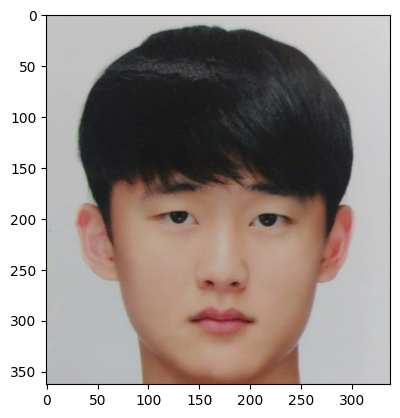

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


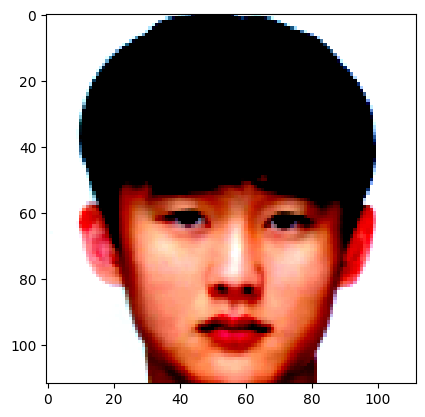

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


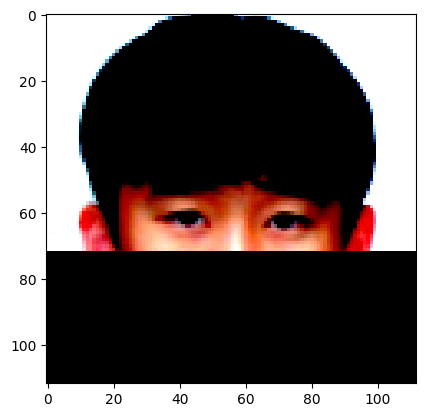

normal image shape: torch.Size([1, 3, 112, 112])
mask image shape: torch.Size([1, 3, 112, 112])
normal image output shape: torch.Size([1, 512])
mask image output shape: torch.Size([1, 512])
--------------------------------------------------
(3088, 2316, 3)


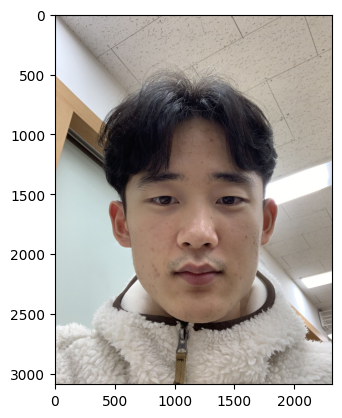

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


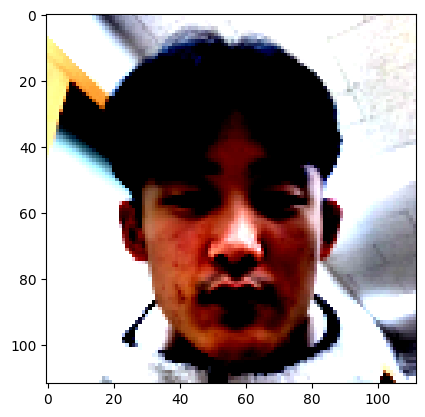

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


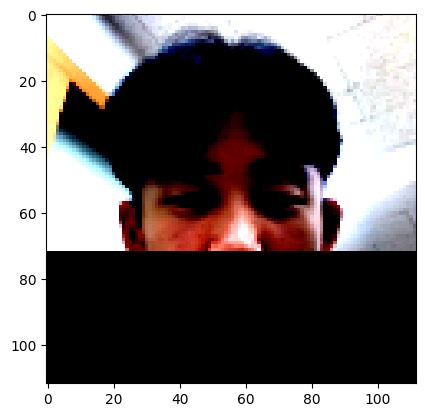

normal image shape: torch.Size([1, 3, 112, 112])
mask image shape: torch.Size([1, 3, 112, 112])
normal image output shape: torch.Size([1, 512])
mask image output shape: torch.Size([1, 512])
--------------------------------------------------
(273, 280, 3)


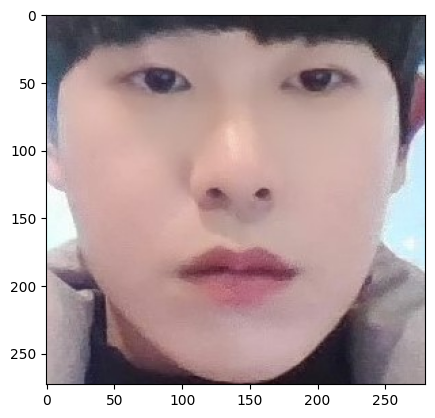

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


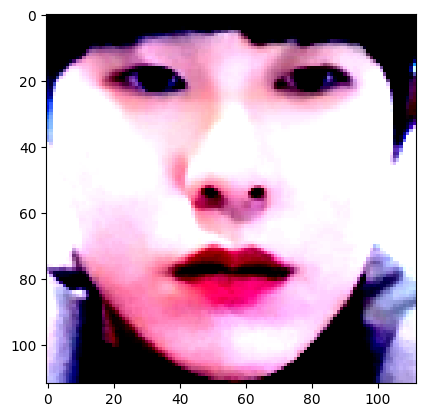

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


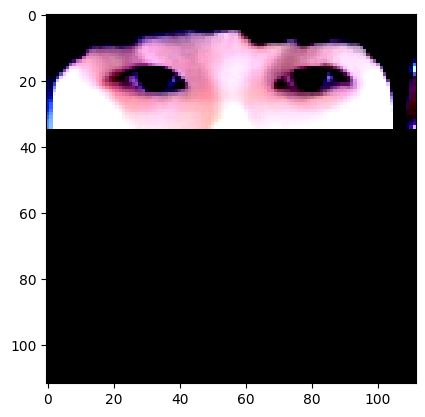

normal image shape: torch.Size([1, 3, 112, 112])
mask image shape: torch.Size([1, 3, 112, 112])
normal image output shape: torch.Size([1, 512])
mask image output shape: torch.Size([1, 512])
--------------------------------------------------
(616, 624, 3)


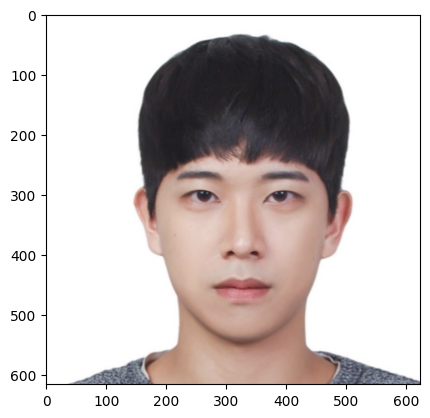

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


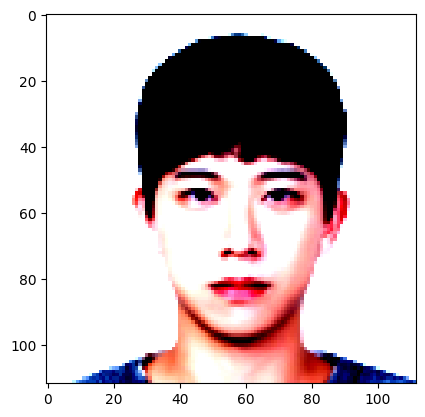

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


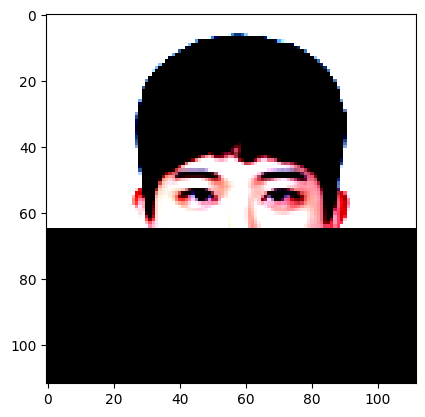

normal image shape: torch.Size([1, 3, 112, 112])
mask image shape: torch.Size([1, 3, 112, 112])
normal image output shape: torch.Size([1, 512])
mask image output shape: torch.Size([1, 512])


In [7]:
import os
import torch
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from torch import nn
from torchvision import transforms
from model import get_model
from model.iresnet import iresnet18

base_dir = "/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/"

weights = torch.load(os.path.join(base_dir,"weights/backbone-r18.pth"), map_location=torch.device("cpu"))
model = iresnet18()
model.load_state_dict(weights)
model.eval()
print("params: {:,}".format(sum([p.data.nelement() for p in model.parameters()])))

normal_vector_list = []
mask_vector_list = []
for i in range(4):
    print("-"*50)
    np_img = cv2.imread(os.path.join(base_dir,f"images/{i}.jpg"))
    np_img = cv2.cvtColor(np_img, cv2.COLOR_RGB2BGR)
    # np_img = np.array(img)
    if np_img.shape[-1] > 3:
        print("alpha channel remove")
        np_img = np_img[:,:,0:3]

    print(np_img.shape)
    plt.imshow(np_img)
    plt.show()

    min_size = min(np_img.shape[0:-1])
    image_transforms = transforms.Compose([
            transforms.ToPILImage(),
            transforms.CenterCrop((min_size,min_size)),
            transforms.Resize(size=(112,112)), 
            transforms.ToTensor(),
            transforms.Normalize(
                [0.485, 0.456, 0.406], 
                [0.229, 0.224, 0.225]
            )
        ])

    torch_img = image_transforms(np_img)
    C, H, W = torch_img.size()
    torch_img = torch_img.view(1,C,H,W)
    mask_img = torch_img.clone()
    if i==0 or i==1:
        mask_img.view(C,H,W).permute(1,2,0)[72:113,:,:] = 0.0
    if i==2:
        mask_img.view(C,H,W).permute(1,2,0)[35:113,:,:] = 0.0
    if i==3:
        mask_img.view(C,H,W).permute(1,2,0)[65:113,:,:] = 0.0
    plt.imshow(torch_img.view(C,H,W).permute(1,2,0))
    plt.show()
    plt.imshow(mask_img.view(C,H,W).permute(1,2,0))
    plt.show()
    print("normal image shape:", torch_img.shape)
    print("mask image shape:", mask_img.shape)
    
    with torch.no_grad():
        model.eval()
        output1 = model(torch_img)
        output2 = model(mask_img)
    print("normal image output shape:", output1.shape)
    print("mask image output shape:", output2.shape)
    normal_vector_list.append(output1)
    mask_vector_list.append(output2)

In [8]:
print(cos_sim(normal_vector_list[0],normal_vector_list[1])) # same
print(cos_sim(normal_vector_list[0],normal_vector_list[2]))
print(cos_sim(normal_vector_list[0],normal_vector_list[3]))
print()
print(cos_sim(normal_vector_list[2],normal_vector_list[3])) # same
print(cos_sim(normal_vector_list[2],normal_vector_list[0]))
print(cos_sim(normal_vector_list[2],normal_vector_list[1]))

tensor(0.4156)
tensor(0.0398)
tensor(0.0187)

tensor(0.2052)
tensor(0.0398)
tensor(-0.0621)


In [9]:
print(cos_sim(mask_vector_list[0],mask_vector_list[1])) # same
print(cos_sim(mask_vector_list[0],mask_vector_list[2]))
print(cos_sim(mask_vector_list[0],mask_vector_list[3]))
print()
print(cos_sim(mask_vector_list[2],mask_vector_list[3])) # same
print(cos_sim(mask_vector_list[2],mask_vector_list[0]))
print(cos_sim(mask_vector_list[2],mask_vector_list[1]))

tensor(0.4838)
tensor(0.3670)
tensor(0.3096)

tensor(0.2405)
tensor(0.3670)
tensor(0.2934)


# Trained model with every margin loss(ArcFace, CosFace, SphereFace)

params: 24,025,600
--------------------------------------------------
(363, 338, 3)


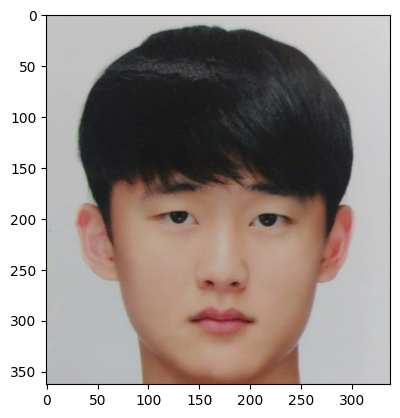

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


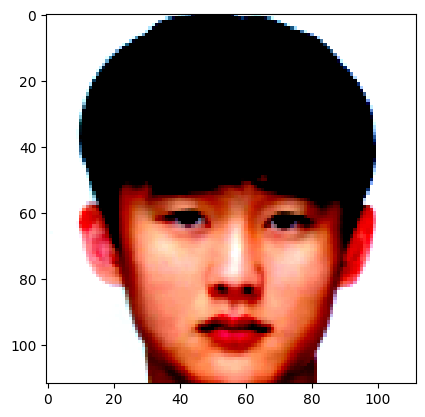

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


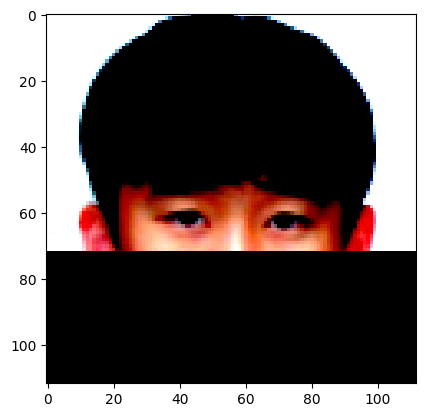

normal image shape: torch.Size([1, 3, 112, 112])
mask image shape: torch.Size([1, 3, 112, 112])
normal image output shape: torch.Size([1, 512])
mask image output shape: torch.Size([1, 512])
--------------------------------------------------
(3088, 2316, 3)


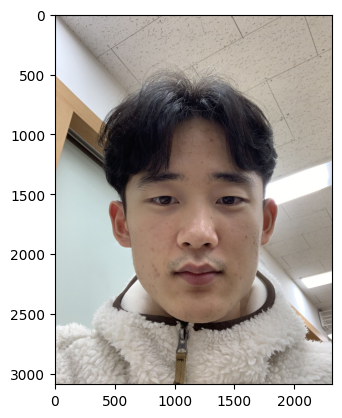

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


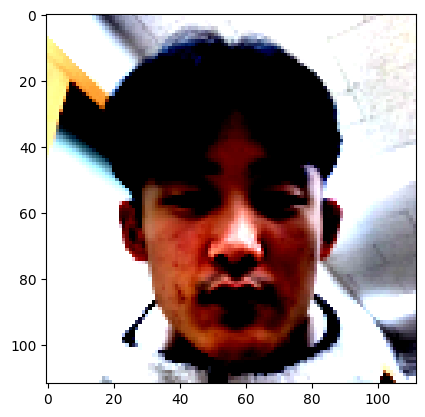

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


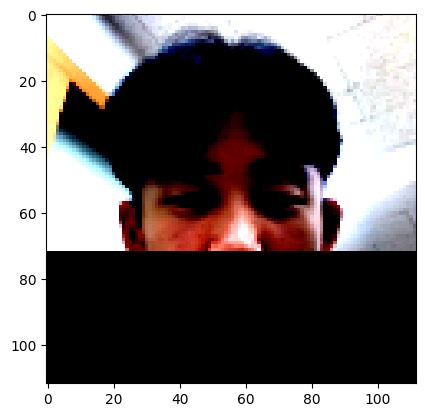

normal image shape: torch.Size([1, 3, 112, 112])
mask image shape: torch.Size([1, 3, 112, 112])
normal image output shape: torch.Size([1, 512])
mask image output shape: torch.Size([1, 512])
--------------------------------------------------
(273, 280, 3)


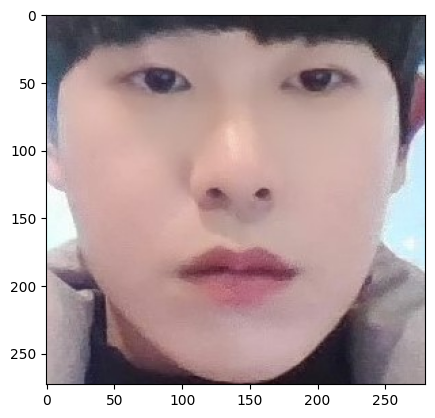

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


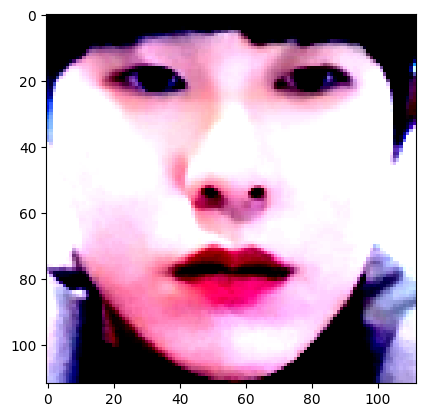

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


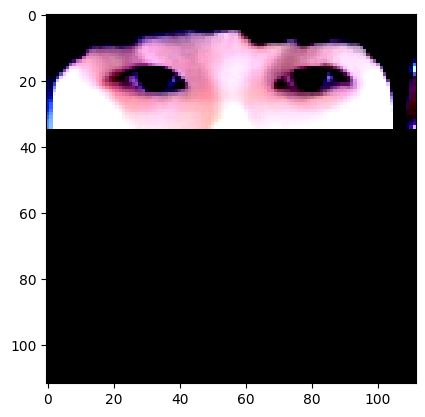

normal image shape: torch.Size([1, 3, 112, 112])
mask image shape: torch.Size([1, 3, 112, 112])
normal image output shape: torch.Size([1, 512])
mask image output shape: torch.Size([1, 512])
--------------------------------------------------
(616, 624, 3)


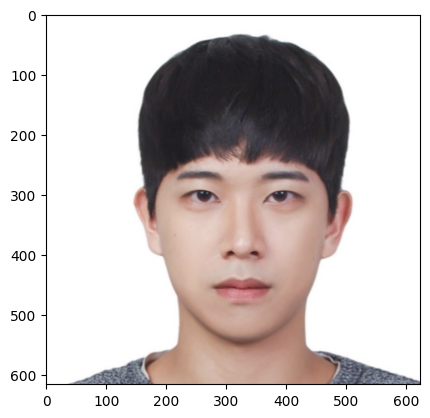

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


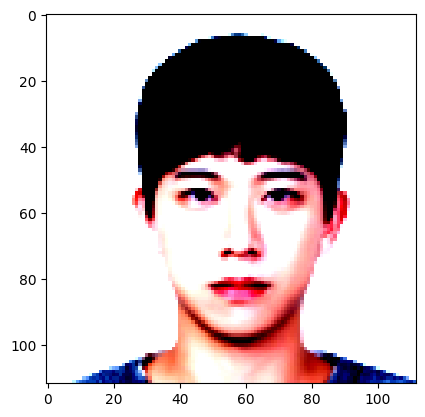

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


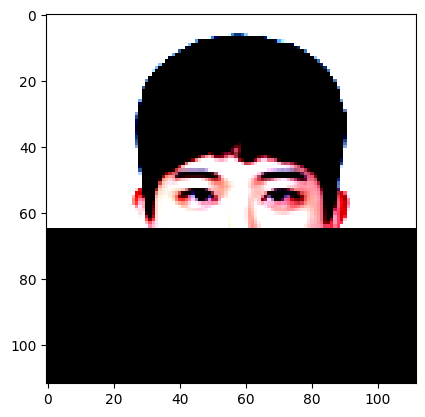

normal image shape: torch.Size([1, 3, 112, 112])
mask image shape: torch.Size([1, 3, 112, 112])
normal image output shape: torch.Size([1, 512])
mask image output shape: torch.Size([1, 512])


In [10]:
import os
import torch
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from torch import nn
from torchvision import transforms
from model import get_model
from model.iresnet import iresnet18

base_dir = "/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/"

weights = torch.load(os.path.join(base_dir,"weights/backbone-every-margin-loss-r18.pth"), map_location=torch.device("cpu"))
model = iresnet18()
model.load_state_dict(weights)
model.eval()
print("params: {:,}".format(sum([p.data.nelement() for p in model.parameters()])))

normal_vector_list = []
mask_vector_list = []
for i in range(4):
    print("-"*50)
    np_img = cv2.imread(os.path.join(base_dir,f"images/{i}.jpg"))
    np_img = cv2.cvtColor(np_img, cv2.COLOR_RGB2BGR)
    # np_img = np.array(img)
    if np_img.shape[-1] > 3:
        print("alpha channel remove")
        np_img = np_img[:,:,0:3]

    print(np_img.shape)
    plt.imshow(np_img)
    plt.show()

    min_size = min(np_img.shape[0:-1])
    image_transforms = transforms.Compose([
            transforms.ToPILImage(),
            transforms.CenterCrop((min_size,min_size)),
            transforms.Resize(size=(112,112)), 
            transforms.ToTensor(),
            transforms.Normalize(
                [0.485, 0.456, 0.406], 
                [0.229, 0.224, 0.225]
            )
        ])

    torch_img = image_transforms(np_img)
    C, H, W = torch_img.size()
    torch_img = torch_img.view(1,C,H,W)
    mask_img = torch_img.clone()
    if i==0 or i==1:
        mask_img.view(C,H,W).permute(1,2,0)[72:113,:,:] = 0.0
    if i==2:
        mask_img.view(C,H,W).permute(1,2,0)[35:113,:,:] = 0.0
    if i==3:
        mask_img.view(C,H,W).permute(1,2,0)[65:113,:,:] = 0.0
    plt.imshow(torch_img.view(C,H,W).permute(1,2,0))
    plt.show()
    plt.imshow(mask_img.view(C,H,W).permute(1,2,0))
    plt.show()
    print("normal image shape:", torch_img.shape)
    print("mask image shape:", mask_img.shape)
    
    with torch.no_grad():
        model.eval()
        output1 = model(torch_img)
        output2 = model(mask_img)
    print("normal image output shape:", output1.shape)
    print("mask image output shape:", output2.shape)
    normal_vector_list.append(output1)
    mask_vector_list.append(output2)

In [11]:
print(cos_sim(normal_vector_list[0],normal_vector_list[1])) # same
print(cos_sim(normal_vector_list[0],normal_vector_list[2]))
print(cos_sim(normal_vector_list[0],normal_vector_list[3]))
print()
print(cos_sim(normal_vector_list[2],normal_vector_list[3])) # same
print(cos_sim(normal_vector_list[2],normal_vector_list[0]))
print(cos_sim(normal_vector_list[2],normal_vector_list[1]))

tensor(0.4175)
tensor(-0.0315)
tensor(0.1434)

tensor(0.1453)
tensor(-0.0315)
tensor(0.0754)


In [12]:
print(cos_sim(mask_vector_list[0],mask_vector_list[1])) # same
print(cos_sim(mask_vector_list[0],mask_vector_list[2]))
print(cos_sim(mask_vector_list[0],mask_vector_list[3]))
print()
print(cos_sim(mask_vector_list[2],mask_vector_list[3])) # same
print(cos_sim(mask_vector_list[2],mask_vector_list[0]))
print(cos_sim(mask_vector_list[2],mask_vector_list[1]))

tensor(0.4064)
tensor(0.2117)
tensor(0.3117)

tensor(0.3790)
tensor(0.2117)
tensor(0.2802)
